## Introduction:   
Instead of multilayer perceptron (see Intro_recurrentNeural Network notebook), we will experiment LSTM recurrent neural network on time series airline Passenger prediction.


In [10]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
seed =7
np.random.seed(seed)
dataframe = pd.read_csv('/home/tri/Downloads/MLdatasets/international-airline-passengers.csv', usecols=[1],engine='python',skipfooter=3)
dataset =dataframe.values.astype('float32')

In [5]:
dataframe[:5]

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


### Preprocessing data:  
LSTM is sensitive with range of data. A good practice is to scale (normalize) before building model

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

## Create a new data

In [14]:
def create_dataset(dataset,look_back=1):
    dataX, dataY =[],[]
    for i in range(len(dataset) -look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)    

In [29]:
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train,test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [30]:
look_back =3
trainX,trainY = create_dataset(train, look_back)
testX,testY  = create_dataset(test, look_back)

 Transform data into LSTM format **[samples,time steps, features]** from current preprocessed data format **[sample,feature]**

In [31]:
# reshape input 
trainX = np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX  = np.reshape(testX,(testX.shape[0],testX.shape[1],1))

In [32]:
def create_model():
    model = Sequential()
    model.add(LSTM(4, input_shape=(None, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    model.fit(trainX,trainY,epochs=100, batch_size=1,verbose=2)
    return model
model = create_model()


Epoch 1/100
0s - loss: 51444.2919
Epoch 2/100
0s - loss: 51349.8884
Epoch 3/100
0s - loss: 51254.8137
Epoch 4/100
0s - loss: 51159.3485
Epoch 5/100
0s - loss: 51064.4965
Epoch 6/100
0s - loss: 50970.1244
Epoch 7/100
0s - loss: 50875.9092
Epoch 8/100
0s - loss: 50781.9117
Epoch 9/100
0s - loss: 50687.8101
Epoch 10/100
0s - loss: 50594.0016
Epoch 11/100
0s - loss: 50500.1948
Epoch 12/100
0s - loss: 50406.7790
Epoch 13/100
0s - loss: 50313.0669
Epoch 14/100
0s - loss: 50219.9283
Epoch 15/100
0s - loss: 50126.5987
Epoch 16/100
0s - loss: 50033.6930
Epoch 17/100
0s - loss: 49940.6131
Epoch 18/100
0s - loss: 49847.7892
Epoch 19/100
0s - loss: 49755.4320
Epoch 20/100
0s - loss: 49662.4941
Epoch 21/100
0s - loss: 49570.6017
Epoch 22/100
0s - loss: 49477.9234
Epoch 23/100
0s - loss: 49385.8396
Epoch 24/100
0s - loss: 49293.5986
Epoch 25/100
0s - loss: 49201.9550
Epoch 26/100
0s - loss: 49109.6975
Epoch 27/100
0s - loss: 49018.3449
Epoch 28/100
0s - loss: 48926.3977
Epoch 29/100
0s - loss: 48834

In [33]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

### Invert prediction

In [34]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

### Evaluation

In [35]:
trainScore =math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print('Train score %.2f RMSE' %(trainScore))
testScore =math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print('Test score %.2f RMSE' %(testScore))

Train score 106882.81 RMSE
Test score 209684.30 RMSE


## Shifting data for plotting

In [39]:
# shift train data
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:]= trainPredict

# shift test data
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:]= testPredict

### Visualizing

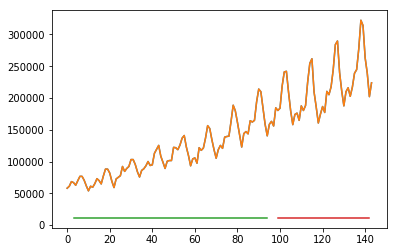

In [40]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()